In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)
sns.set()

In [2]:
path = '..\\dataset\\de-mini-project\\11-cohort.csv'
df = pd.read_csv(path)

In [7]:
df['buy_interval'] = df['buy_interval']+1

In [8]:
df.head()

,first_time_buy,users,buy_interval,users_transacting,%_user_transacting
0,1,27,1,27,100.000
1,1,27,2,6,22.222
2,1,27,3,6,22.222
3,1,27,4,8,29.630
4,1,27,5,7,25.926


In [61]:
series_temp = pd.Series()

for month in range(1, 13):
    temp_df = df[df['first_time_buy'] == month]['%_user_transacting']
    temp_df.index = range(0, len(temp_df))
    series_temp = pd.concat([series_temp, temp_df], axis=1)

C:\Users\ichfa\AppData\Local\Temp\ipykernel_8376\1054150430.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series_temp = pd.Series()


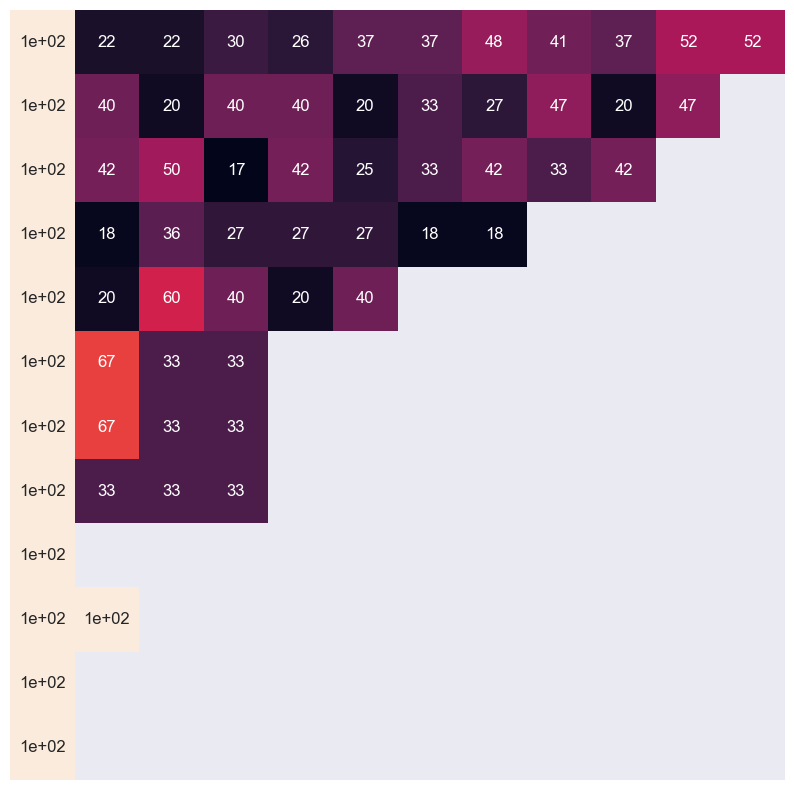

In [75]:
plt.figure(figsize=(10,10))

sns.heatmap(series_temp.drop(0, axis=1).T, 
           xticklabels=False,
           yticklabels=False, 
           cbar=False,
           annot=True)
plt.savefig('..\\dataset\\de-mini-project\\cohort-retention.jpg')
plt.show()